In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


In [5]:
df = pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')


In [6]:
df.sample(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
9454,45624756,29479,1058,TOYOTA,Highlander,2012,Jeep,Yes,Hybrid,3.5,205250 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
9764,45803692,29169,770,HYUNDAI,Tucson,2016,Jeep,Yes,Diesel,1.7,170000 km,4.0,Automatic,Front,04-May,Left wheel,White,4
15985,45660168,4704,-,VOLKSWAGEN,Jetta,1999,Sedan,No,Petrol,2,248000 km,4.0,Manual,Front,04-May,Left wheel,Black,8
4856,45781820,13799,-,TOYOTA,Aqua,2014,Hatchback,No,Hybrid,1.5,182000 km,4.0,Automatic,Front,04-May,Right-hand drive,White,6
17583,45804262,47757,765,JEEP,Cherokee,2015,Jeep,Yes,Diesel,2,171561 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
df['Wheel'].unique()


array(['Left wheel', 'Right-hand drive'], dtype=object)

In [9]:
df['Doors'].unique()


array(['04-May', '02-Mar', '>5'], dtype=object)

In [10]:
# Remove unnecessary Columns and Drop Duplicates
df = df.drop(["ID", "Model"], axis="columns")

# Drop Duplicates
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 3530


In [11]:
null_columns = df.columns[df.isnull().any()]

# Display the columns with null values, their corresponding counts, and data types
if null_columns.empty:
    print("No missing values found in the DataFrame.")
else:
    for column in null_columns:
        print(f"Column '{column}' with data type {df[column].dtype} has {df[column].isnull().sum()} null values.")


No missing values found in the DataFrame.


In [12]:
label_encoder = LabelEncoder()

# Iterate through object columns and encode them
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))


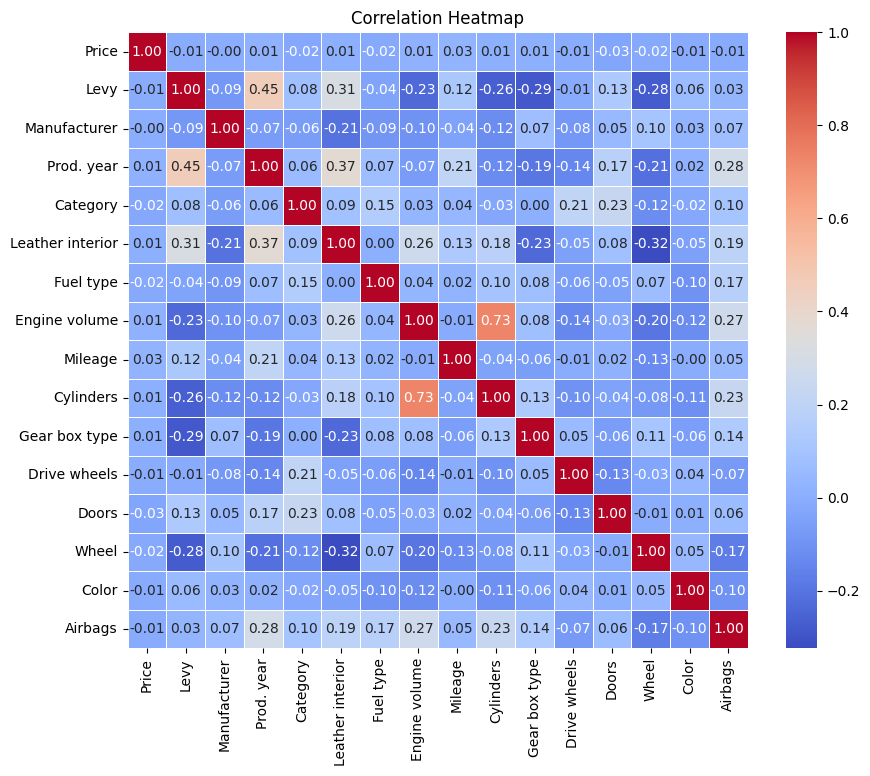

In [13]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Create a correlation matrix
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a seaborn heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [14]:
columns_to_drop = ['Drive wheels', 'Manufacturer','Leather interior']  # Replace with the actual column names you want to drop

df = df.drop(columns=columns_to_drop)

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# Assuming `df` is your DataFrame
numerical_columns = df.select_dtypes(include=['float', 'int']).columns
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Apply scaling to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [18]:
df.head()

,Price,Levy,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Color,Airbags
0,0.000507,0.204301,0.876543,0.4,0.333333,0.594340,0.369243,0.333333,0.000000,0.5,0.0,0.800000,0.750
1,0.000632,0.007168,0.888889,0.4,0.833333,0.528302,0.385116,0.333333,0.666667,0.5,0.0,0.066667,0.500
2,0.000322,0.000000,0.827160,0.3,0.833333,0.207547,0.408535,0.200000,1.000000,0.5,1.0,0.066667,0.125
3,0.000137,0.917563,0.888889,0.4,0.333333,0.433962,0.313947,0.200000,0.000000,0.5,0.0,0.933333,0.000
4,0.000446,0.655914,0.925926,0.3,0.833333,0.207547,0.962269,0.200000,0.000000,0.5,0.0,0.800000,0.250


In [20]:
X = df.drop(columns=['Price'])
y = df['Price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to evaluate
models = {
    'Ridge': (Ridge(), {'alpha': [0.1, 1, 10]}),
    'LinearRegression': (LinearRegression(), {}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'criterion': ['squared_error', 'absolute_error']}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [10, 50], 'max_depth': [3, 4]}),
    'KNeighborsRegressor': (KNeighborsRegressor(), {'n_neighbors': np.arange(2, 5, 9), 'weights': ['uniform']}),
    'SVR': (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1], 'gamma': [0.1, 0.01]}),
    'XGBRegressor': (XGBRegressor(), {'n_estimators': [10, 50], 'loss': ['ls', 'lad', 'huber', 'quantile']}),
    'GradientBoostingRegressor': (GradientBoostingRegressor(),
                                   {'n_estimators': [10, 50], 'learning_rate': [0.1, 0.01, 0.001]})
}

best_rmse = float('inf')
best_model = None

for name, (model, param_grid) in models.items():
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=2)

    # Train the model
    grid_search.fit(X_train, y_train)

    # Make predictions
    y_pred = grid_search.predict(X_test)

    # Evaluate the model
    mse= mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae= mean_absolute_error(y_test, y_pred)
    print(f"Model: {name}")
    print('mean_absolute_error:', mae)
    print('mean_squared_error:', mse)
    print('Root_mean_squared_error:', rmse)
    # Calculate the combined score
    score = mae + mse + rmse
    print('Combined Score:', score)
    print('----------------------------------------')

    # Check if this model has the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = grid_search.best_estimator_

    # Print the best parameters and best model
    print(name, 'Best parameters:', grid_search.best_params_)
    print('\n')

# Print the best model based on RMSE
print(f"Best model based on RMSE: {best_model}")

Model: Ridge
mean_absolute_error: 0.0005253726933139065
mean_squared_error: 8.708695239682155e-07
Root_mean_squared_error: 0.0009332039026751954
Combined Score: 0.00145944746551307
----------------------------------------
Ridge Best parameters: {'alpha': 10}


Model: LinearRegression
mean_absolute_error: 0.0005249791685360955
mean_squared_error: 8.718864226169405e-07
Root_mean_squared_error: 0.0009337485864069303
Combined Score: 0.0014595996413656427
----------------------------------------
LinearRegression Best parameters: {}


Model: DecisionTreeRegressor
mean_absolute_error: 0.0003085367606384984
mean_squared_error: 4.7062500200470294e-07
Root_mean_squared_error: 0.0006860211381617209
Combined Score: 0.000995028523802224
----------------------------------------
DecisionTreeRegressor Best parameters: {'criterion': 'absolute_error'}


Model: RandomForestRegressor
mean_absolute_error: 0.00036430565910552633
mean_squared_error: 6.257612332328938e-07
Root_mean_squared_error: 0.0007910507

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:43:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:43:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:43:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:43:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:43:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/

Model: XGBRegressor
mean_absolute_error: 0.0002694614327245861
mean_squared_error: 3.7800889361551665e-07
Root_mean_squared_error: 0.0006148242786483929
Combined Score: 0.0008846637202665946
----------------------------------------
XGBRegressor Best parameters: {'loss': 'ls', 'n_estimators': 10}


Model: GradientBoostingRegressor
mean_absolute_error: 0.0005003528740582521
mean_squared_error: 8.4902750738971e-07
Root_mean_squared_error: 0.0009214268866218903
Combined Score: 0.0014226287881875322
----------------------------------------
GradientBoostingRegressor Best parameters: {'learning_rate': 0.001, 'n_estimators': 10}


Best model based on RMSE: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
    